<h1>IS 362 – Week 8 Assignment</h1>
<br>
<p>Your task in this week’s assignment is to load a dataset, perform some minor cleanup and transformation tasks, then use exploratory data analysis to learn about the distribution of variables and the relationship between variables.<br>
Here is a link to the “Auto MPG” dataset in the UC Irvine data repository: https://archive.ics.uci.edu/ml/datasets/Auto+MPG.</p>
<ol>
    <li>Load the data in the (yellow highlighted) Data Folder in the file auto-mpg.data into a pandas DataFrame.</li>
    <li>Review the data and the provided data set description.</li>
    <li>Use the attribute information provided in auto-mpg.names to name your pandas DataFrame columns.</li>
    <li>Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric.</li>
    <li>The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’</li>
    <li>Create a bar chart that shows the distribution for cylinders.</li>
    <li>Create a scatterplot that shows the relationship between horsepower and weight.</li>
    <li>Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting question about the distribution of one of the variables, or the relationship between two (or more!) of the variables in the “Auto MPG” dataset.
The figure to the right shows an example of an advanced plot that can be created from the auto-mpg dataset using pandas and seaborn.</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

<h4>1. Load the data in the (yellow highlighted) Data Folder in the file auto-mpg.data into a pandas DataFrame.</h4>

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
mpg = pd.read_csv(path, delim_whitespace=True, header=None)

<h4>2. Review the data and the provided data set description.</h4>

In [3]:
mpg

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


<h4>3. Use the attribute information provided in auto-mpg.names to name your pandas DataFrame columns.</h4>

In [4]:
columns = ['MPG','Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'ModelYear', 'Origin', 'Model']
mpg.columns = columns
mpg

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin,Model
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


<h4>4. Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric.</h4>

In [5]:
mpg.loc[mpg['Horsepower'] == '?']

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin,Model
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [6]:
mpg.Horsepower.replace('?', np.NaN, inplace=True)
mpg.Horsepower = pd.to_numeric(mpg.Horsepower)
mpg

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin,Model
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


<h4>5. The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’</h4>

In [7]:
mpg = mpg.replace({'Origin': {1:'USA', 2:'Asia', 3:'Europe'}})
mpg

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin,Model
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,Asia,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA,ford ranger


<h4>6. Create a bar chart that shows the distribution for cylinders.</h4>

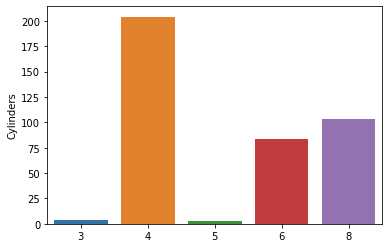

In [8]:
sns.barplot(x=mpg['Cylinders'].value_counts().index, y=mpg['Cylinders'].value_counts())

<h4>7. Create a scatterplot that shows the relationship between horsepower and weight.</h4>

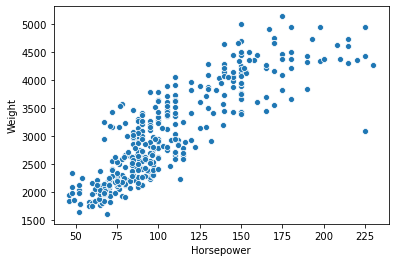

In [9]:
sns.scatterplot(x=mpg['Horsepower'], y=mpg['Weight'])

<h4>8. Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting question about the distribution of one of the variables, or the relationship between two (or more!) of the variables in the “Auto MPG” dataset.</h4>

<p>How does the weight of a car effect the MPG?<br>Are cars from certain origins more likely to have a better weight to mileage ratio?</p>
<p>Answer: Usually, the lighter the car the better the mileage. USA made car tend to be heavier with worse mileage while European and Asian cars tend to be lighter with better mileage.</p>

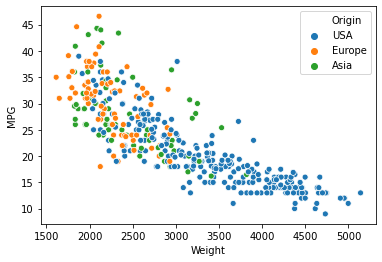

In [10]:
sns.scatterplot(x=mpg['Weight'], y=mpg['MPG'], hue=mpg['Origin'])